In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time

In [42]:
# 时间设置
start_time = 1520611200
end_time = 1520697600
step = 1

In [43]:
df = pd.read_table('../data/all-one-second',header=None,names=['ap_mac','time','count'])

In [44]:
def timestap_date(value):
    format = '%Y-%m-%d %H:%M:%S'
    value = time.localtime(value)
    return time.strftime(format,value)

# 建立一个空的全时间序列
def gen_full_time_df(start_time,end_time,step):
    all_time = np.arange(start_time,end_time,60*step)
    full_time_df = pd.DataFrame(data={'time':all_time})
    return full_time_df,all_time

# df拆分为每个mac的时间序列
def split_merge_ts(df,full_time_df):
    ap_macs = df.ap_mac.unique()
    for mac in ap_macs:
        cur_df = df[df.ap_mac == mac].loc[:,['time','count']]
        merge_df = pd.merge(full_time_df,cur_df,how='left')
        merge_df = merge_df.rename(columns={'count':mac})
        full_time_df = merge_df
    full_time_df.fillna(0,inplace=True)
    return full_time_df

In [45]:
full_time_df,all_time = gen_full_time_df(start_time,end_time,step)
all_split_ts = split_merge_ts(df,full_time_df)
all_split_ts.set_index('time').to_csv('../data/all_split_ts_1second.scv')

In [46]:
readable_ts = all_split_ts.copy()
readable_ts['time'] = readable_ts.time.apply(timestap_date)
readable_ts = readable_ts.set_index('time')

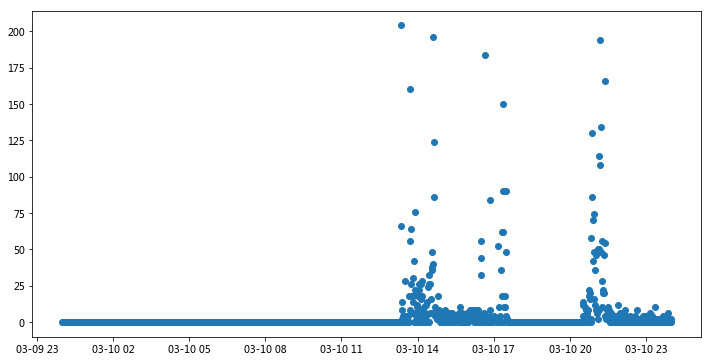

In [47]:
fig, ax = plt.subplots(1)
ax.plot_date(readable_ts.index.values,readable_ts[readable_ts.columns[0]].values)
plt.gcf().set_size_inches(12,6)
plt.show()

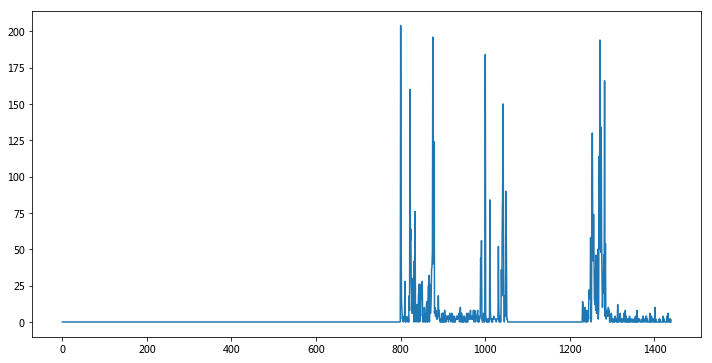

In [49]:
plt.plot(readable_ts[readable_ts.columns[0]].values)
plt.gcf().set_size_inches(12,6)
plt.show()